In [2]:
! pip install kaggle

In [27]:
# library
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle (1).json"

In [5]:
!kaggle datasets download -d stealthtechnologies/traffic-time-series-dataset

Dataset URL: https://www.kaggle.com/datasets/stealthtechnologies/traffic-time-series-dataset
License(s): apache-2.0
  0% 0.00/47.3k [00:00<?, ?B/s]
100% 47.3k/47.3k [00:00<00:00, 35.5MB/s]


In [6]:
with ZipFile("traffic-time-series-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("traffic_data")

In [10]:
# load of data
data = pd.read_csv('/content/traffic_data/traffic_dataset_with_trend.csv')

In [24]:
# EDA
data.head()
#Timestamp: The date and time of the observation.Weather: The weather condition at the time of the observation (e.g., Clear, Cloudy, Rain, Snow).

#Events: A binary variable indicating whether there was a special event affecting traffic at the time of the observation (True or False).

#Traffic Volume: The volume of traffic at the location at the time of the observation.

,Timestamp,Weather,Events,Traffic Volume
0,2023-01-01 00:00:00,Cloudy,False,803.0
1,2023-01-01 01:00:00,Clear,False,861.0
2,2023-01-01 02:00:00,Clear,False,582.0
3,2023-01-01 03:00:00,Cloudy,False,236.0
4,2023-01-01 04:00:00,Cloudy,False,569.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       8736 non-null   object 
 1   Weather         8736 non-null   object 
 2   Events          8736 non-null   bool   
 3   Traffic Volume  8736 non-null   float64
dtypes: bool(1), float64(1), object(2)
memory usage: 213.4+ KB


In [13]:
data.isnull().sum()

,0
Timestamp,0
Weather,0
Events,0
Traffic Volume,0


In [14]:
data.describe()

,Traffic Volume
count,8736.000000
mean,1281.395833
std,727.291462
min,118.000000
25%,893.000000
50%,1123.000000
75%,1415.000000
max,6465.000000


In [15]:
data.shape

(8736, 4)

In [16]:
data.duplicated().sum()

0

In [17]:
data.nunique()

,0
Timestamp,8736
Weather,4
Events,2
Traffic Volume,2072


In [18]:
data['Events'].unique()

array([False,  True])

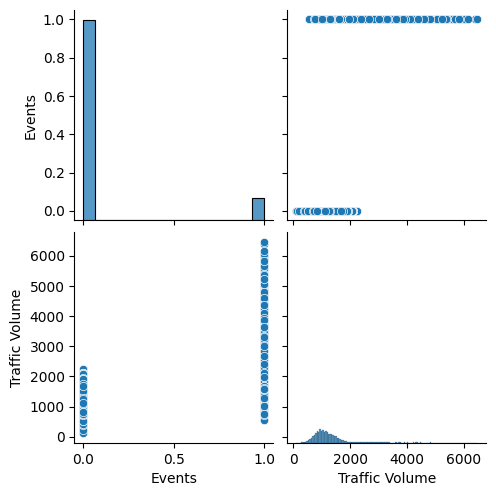

In [20]:
sns.pairplot(data)

<Axes: xlabel='count', ylabel='Weather'>

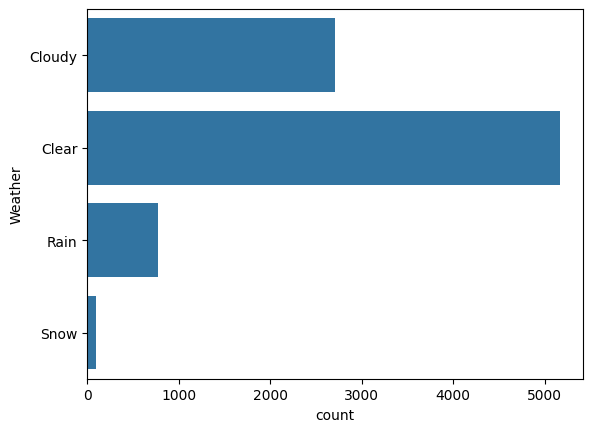

In [23]:
sns.countplot(data['Weather'])

In [28]:
fig = px.box(data, x='Weather', y='Traffic Volume',
             title='Interactive Relationship between Weather and Traffic Volume',
             labels={'Weather': 'Weather', 'Traffic Volume': 'Traffic Volume'})


fig.show()

In [29]:
# Preprocessing
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [30]:
data

,Timestamp,Weather,Events,Traffic Volume
0,2023-01-01 00:00:00,Cloudy,False,803.0
1,2023-01-01 01:00:00,Clear,False,861.0
2,2023-01-01 02:00:00,Clear,False,582.0
3,2023-01-01 03:00:00,Cloudy,False,236.0
4,2023-01-01 04:00:00,Cloudy,False,569.0
...,...,...,...,...
8731,2023-12-30 19:00:00,Cloudy,False,1118.0
8732,2023-12-30 20:00:00,Clear,False,1681.0
8733,2023-12-30 21:00:00,Cloudy,False,833.0
8734,2023-12-30 22:00:00,Clear,False,740.0
